# Customer Analysis - Part 3

## Importing and general cleaning

Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### We define a series of functions for our data cleaning pipe:

In [8]:
#Function for reading the data:
def read_customer_data():
    return pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv")

In [10]:
#Function for standardizing column names:
def standardize(df):
    new_columns = df.columns.str.lower().str.replace(" ", "_")
    df.columns = new_columns
    return df

In [11]:
#Function for dropping customer and unnamed:_0 columns
def drop_2cols(df):
    df.drop(columns=["unnamed:_0", "customer"], inplace=True)
    return df

In [12]:
#Drop duplicates and reset index
def dd(df):
    df = df.drop_duplicates().reset_index()
    df.drop(columns=["index"], inplace=True)
    return df

In [13]:
#Replacing null values
def fill_null(df):
    df["number_of_open_complaints"] = df["number_of_open_complaints"].fillna(value=0)
    mean_months = round(df["months_since_last_claim"].mean())
    df["months_since_last_claim"] = df["months_since_last_claim"].fillna(value=mean_months)
    mean_income = round(df["income"].mean())
    df["income"] = df["income"].fillna(value=mean_income)
    return df

## Running the pipe

In [14]:
df = read_customer_data().pipe(standardize).pipe(drop_2cols).pipe(dd).pipe(fill_null)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          10163 non-null  object 
 1   customer_lifetime_value        10776 non-null  float64
 2   response                       10163 non-null  object 
 3   coverage                       10776 non-null  object 
 4   education                      10776 non-null  object 
 5   effective_to_date              10776 non-null  object 
 6   employmentstatus               10776 non-null  object 
 7   gender                         10776 non-null  object 
 8   income                         10776 non-null  int64  
 9   location_code                  10776 non-null  object 
 10  marital_status                 10776 non-null  object 
 11  monthly_premium_auto           10776 non-null  int64  
 12  months_since_last_claim        10776 non-null 

## Activity 2

Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

In [15]:
df1 = df.copy()

In [16]:
df1["state"].value_counts()

California    3512
Oregon        2861
Arizona       1918
Nevada         987
Washington     885
Name: state, dtype: int64

In [17]:
def region(x):
    if x != x:
        return x
    else:
        dic = {"California": "West Region", "Oregon": "North West", "Washington": "East",
               "Arizona": "Central", "Nevada": "Central"}
        return dic[x]
    
df1["region"] = df1["state"].apply(region)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          10163 non-null  object 
 1   customer_lifetime_value        10776 non-null  float64
 2   response                       10163 non-null  object 
 3   coverage                       10776 non-null  object 
 4   education                      10776 non-null  object 
 5   effective_to_date              10776 non-null  object 
 6   employmentstatus               10776 non-null  object 
 7   gender                         10776 non-null  object 
 8   income                         10776 non-null  int64  
 9   location_code                  10776 non-null  object 
 10  marital_status                 10776 non-null  object 
 11  monthly_premium_auto           10776 non-null  int64  
 12  months_since_last_claim        10776 non-null 

df1["region"].value_counts()

### Rearranging the columns -> placing region next to state


In [33]:
df1 = df1[['state',
         "region",
         "customer_lifetime_value",
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']]

In [34]:
df1

,state,region,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Arizona,Central,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,California,West Region,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,Washington,East,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,Oregon,North West,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,Oregon,North West,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10771,Nevada,Central,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10772,Oregon,North West,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10773,Arizona,Central,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10774,California,West Region,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


# Activity 3

Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [35]:
df2 = df1.copy()


In [36]:
df2["effective_to_date"]

0        2/18/11
1        1/18/11
2        2/10/11
3        1/11/11
4        1/17/11
          ...   
10771    1/19/11
10772     1/6/11
10773     2/6/11
10774    2/13/11
10775     1/8/11
Name: effective_to_date, Length: 10776, dtype: object

### Storing the new dates column

In [37]:
df2["date_column"] = pd.to_datetime(df2["effective_to_date"])
df2["date_column"].value_counts()

2011-01-27    238
2011-01-10    236
2011-01-17    220
2011-01-31    217
2011-01-26    217
2011-02-14    217
2011-01-19    212
2011-01-03    211
2011-02-27    202
2011-01-28    199
2011-02-04    198
2011-01-21    198
2011-02-26    197
2011-01-20    195
2011-02-19    195
2011-02-07    194
2011-02-03    193
2011-01-11    193
2011-01-05    190
2011-02-22    189
2011-02-28    188
2011-01-02    186
2011-02-10    184
2011-02-18    183
2011-02-11    183
2011-01-18    182
2011-02-25    182
2011-02-12    181
2011-02-02    181
2011-01-23    180
2011-01-29    179
2011-01-08    179
2011-02-01    178
2011-02-05    178
2011-01-14    178
2011-01-09    177
2011-02-09    177
2011-01-24    176
2011-02-21    175
2011-01-07    175
2011-02-23    173
2011-01-15    172
2011-01-16    172
2011-01-13    171
2011-02-06    170
2011-01-01    168
2011-01-30    168
2011-02-13    167
2011-02-16    166
2011-01-25    166
2011-02-24    162
2011-01-06    160
2011-02-17    160
2011-02-20    156
2011-02-08    155
2011-02-15

### Select out of the data column the months

In [23]:
df2["month_column"] = df2["date_column"].apply(lambda x: x.month)

In [24]:
df2["month_column"].value_counts()

1    5737
2    5039
Name: month_column, dtype: int64

### Cooler way by Raffa with the Month name

In [25]:
df2["months_column"]=list(map(lambda date:date.strftime(format="%B"),df2["date_column"]))

In [27]:
df2["months_column"].value_counts()

January     5737
February    5039
Name: months_column, dtype: int64

### Which columns are numerical?

In [29]:
df2._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month_column
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,9025.067525,23675,117,15.0,31,0.0,7,707.925645,1
...,...,...,...,...,...,...,...,...,...
10771,15563.369440,0,253,15.0,40,0.0,7,1214.400000,1
10772,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10773,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2
10774,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2


### Check and deal with NaN values. (Hint:Replacing null values – Replace missing values with means of the column (for numerical columns)

#this was done on top already in form of a pipeline function (ie. replacing null values)

### BONUS: Put all the previously mentioned data transformations into a function/functions.

#this was done on top already in form of all pipeline function created

In [31]:
df2

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,region,date_column,month_column,months_column
0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,Central,2011-02-18,2,February
1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,West Region,2011-01-18,1,January
2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,Offer3,Call Center,480.000000,SUV,Medsize,A,East,2011-02-10,2,February
3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,North West,2011-01-11,1,January
4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,...,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,North West,2011-01-17,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10771,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,...,Offer3,Web,1214.400000,Luxury Car,Medsize,A,Central,2011-01-19,1,January
10772,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,...,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,North West,2011-01-06,1,January
10773,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,...,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,Central,2011-02-06,2,February
10774,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,...,Offer1,Branch,618.288849,SUV,Medsize,A,West Region,2011-02-13,2,February


## Converting some strings elements to lowercase in df

In [38]:
df3 = df2.copy()

In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          10163 non-null  object        
 1   region                         10163 non-null  object        
 2   customer_lifetime_value        10776 non-null  float64       
 3   response                       10163 non-null  object        
 4   coverage                       10776 non-null  object        
 5   education                      10776 non-null  object        
 6   effective_to_date              10776 non-null  object        
 7   employmentstatus               10776 non-null  object        
 8   gender                         10776 non-null  object        
 9   income                         10776 non-null  int64         
 10  location_code                  10776 non-null  object        
 11  marital_status 

In [46]:
#columns_cat = [df3.columns[2:8] + df3.columns[16:20] + df3.columns[9:11] + df3.columns[21:24]]
list_indexes = list(range(3,9)) + list(range(17,21)) + list(range(10,12)) + list(range(22,24))
df3[df3.columns[list_indexes]] = df3[df3.columns[list_indexes]].applymap(lambda x: x.lower() if x==x else x)
df3

,state,region,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,date_column
0,Arizona,Central,4809.216960,no,basic,college,2/18/11,employed,m,48029,...,0.0,9,corporate auto,corporate l3,offer3,agent,292.800000,four-door car,medsize,2011-02-18
1,California,West Region,2228.525238,no,basic,college,1/18/11,unemployed,f,0,...,0.0,1,personal auto,personal l3,offer4,call center,744.924331,four-door car,medsize,2011-01-18
2,Washington,East,14947.917300,no,basic,bachelor,2/10/11,employed,m,22139,...,0.0,2,personal auto,personal l3,offer3,call center,480.000000,suv,medsize,2011-02-10
3,Oregon,North West,22332.439460,yes,extended,college,1/11/11,employed,m,49078,...,0.0,2,corporate auto,corporate l3,offer2,branch,484.013411,four-door car,medsize,2011-01-11
4,Oregon,North West,9025.067525,no,premium,bachelor,1/17/11,medical leave,f,23675,...,0.0,7,personal auto,personal l2,offer1,branch,707.925645,four-door car,medsize,2011-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10771,Nevada,Central,15563.369440,no,premium,bachelor,1/19/11,unemployed,f,0,...,0.0,7,personal auto,personal l1,offer3,web,1214.400000,luxury car,medsize,2011-01-19
10772,Oregon,North West,5259.444853,no,basic,college,1/6/11,employed,f,61146,...,0.0,6,personal auto,personal l3,offer2,branch,273.018929,four-door car,medsize,2011-01-06
10773,Arizona,Central,23893.304100,no,extended,bachelor,2/6/11,employed,f,39837,...,0.0,2,corporate auto,corporate l3,offer1,web,381.306996,luxury suv,medsize,2011-02-06
10774,California,West Region,11971.977650,no,premium,college,2/13/11,employed,f,64195,...,4.0,6,personal auto,personal l1,offer1,branch,618.288849,suv,medsize,2011-02-13


# Activity 4

### Show a plot of the total number of responses

In [47]:
number_of_responses=df3["response"].value_counts()
number_of_responses

no     8795
yes    1368
Name: response, dtype: int64

<AxesSubplot:title={'center':'number of responses'}, ylabel='response'>

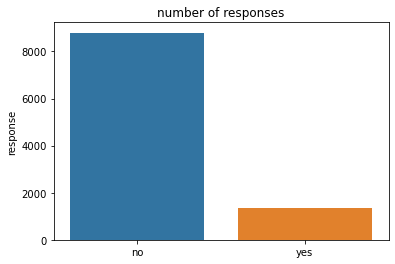

In [48]:
fig1, ax1 = plt.subplots()
ax1.set_title("number of responses")

sns.barplot(x=number_of_responses.index, y = number_of_responses)

### Show a plot of the response rate by the sales channel

In [52]:
list(df3)

['state',
 'region',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size',
 'date_column']

In [50]:
df3['sales_channel'].value_counts()

agent          4064
branch         2994
call center    2115
web            1603
Name: sales_channel, dtype: int64

In [51]:
df3["response"].value_counts()

no     8795
yes    1368
Name: response, dtype: int64

In [53]:
#creation of a new table who`s data is platted later on (via groupby function)

rsp_by_channel = df3.groupby(['response','sales_channel']).size().reset_index(name="total")
rsp_by_channel

,response,sales_channel,total
0,no,agent,3142
1,no,branch,2533
2,no,call center,1790
3,no,web,1330
4,yes,agent,694
5,yes,branch,307
6,yes,call center,204
7,yes,web,163


<AxesSubplot:title={'center':'Response Rate by Channel'}, xlabel='response', ylabel='total'>

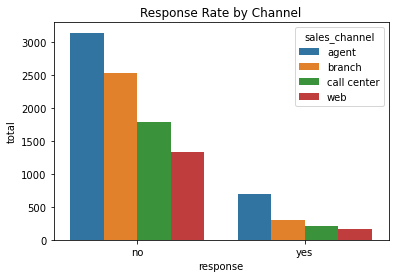

In [54]:
# plotting the absolute values for each channel concerning binary response answer

fig, ax = plt.subplots()

# we add a title to the figure or the ax
# use set_title() on the axis
ax.set_title("Response Rate by Channel")

# we plot the different lines
# add every plot(x, y, label=, c=) to the SAME axis with plot
sns.barplot(x = rsp_by_channel["response"], y = rsp_by_channel["total"], hue = rsp_by_channel["sales_channel"]) 


### Show a plot of the response rate by the total claim amount

In [59]:
#Looking for max. and min. for each column to be plotted so size can be calibrated

df3.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000
mean,8016.710885,37543.735152,93.200260,15.138456,48.120638,0.361730,2.979306,434.759809
std,6885.053012,30397.579910,34.408721,9.782011,27.928243,0.888701,2.398228,292.452845
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,270.290316
50%,5774.709107,33837.000000,83.000000,15.000000,48.000000,0.000000,2.000000,383.403043
75%,8991.339270,62329.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [55]:
# Again, creation of a new table who`s data is platted later on (via groupby function)

rsp_by_channel2 = df3.groupby(['response','total_claim_amount']).size().reset_index(name="total2")
rsp_by_channel2


,response,total_claim_amount,total2
0,no,0.099007,1
1,no,0.382107,2
2,no,0.423310,2
3,no,0.517753,1
4,no,0.769185,1
...,...,...,...
5161,yes,1261.319869,6
5162,yes,1294.700423,6
5163,yes,1300.800000,5
5164,yes,1324.800000,7


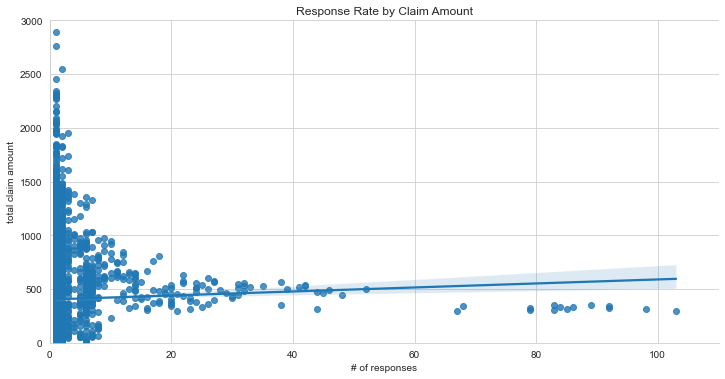

In [57]:
# plotting the absolute values for each claim amounted -> better in a scatterplot

sns.set_style("whitegrid")
g = sns.lmplot(x="total2", y="total_claim_amount",data=rsp_by_channel2, aspect=2)
g = (g.set_axis_labels("# of responses","total claim amount").set(xlim=(0,110),ylim=(0,3000)))
plt.title("Response Rate by Claim Amount")
plt.show(g)

### Show a plot of the response rate by income

In [60]:
rsp_by_channel3 = df3.groupby(['response','income']).size().reset_index(name="total3")
rsp_by_channel3

,response,income,total3
0,no,0,2388
1,no,10037,1
2,no,10074,1
3,no,10097,2
4,no,10105,1
...,...,...,...
5699,yes,95697,14
5700,yes,96306,6
5701,yes,97131,7
5702,yes,97361,6


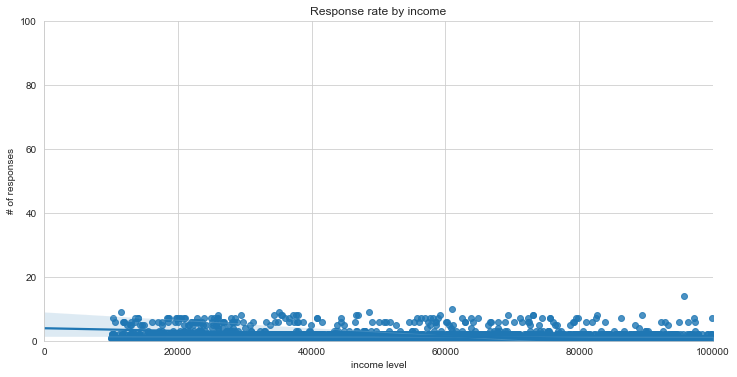

In [61]:
# plotting the absolute values for each income observation-> zero values are missed out

sns.set_style("whitegrid")
g = sns.lmplot(x="income", y="total3",data=rsp_by_channel3, aspect=2)
g = (g.set_axis_labels("income level","# of responses").set(xlim=(0,100000),ylim=(0,100)))
plt.title("Response rate by income")
plt.show(g)

### Plot the Correlation Heatmap

<AxesSubplot:>

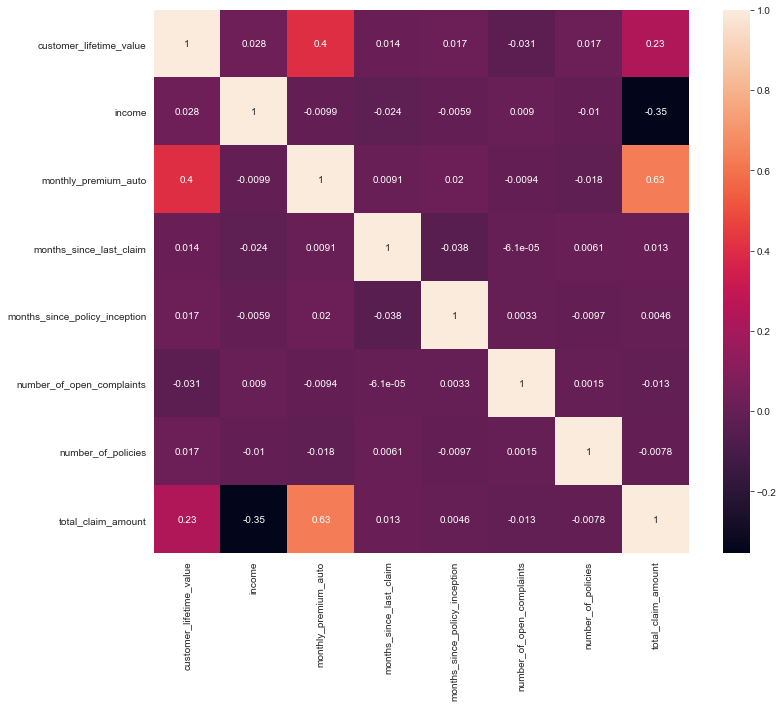

In [62]:

fig,ax = plt.subplots(figsize = (12,10))
sns.heatmap(df3.corr(), annot = True, ax=ax)

### Findings

Largest positive correlation is between total_claim_amount and premium_auto
this can be explained by more expensive cars require higher premium payments
and if there is a damage, these more expensive cars create higher claim amounts.

### Don't Limit your creativity! plot Any interesting findings/insights that describe some interesting facts about your data set and its variables. Use the relevant plotting when you feel it is needed

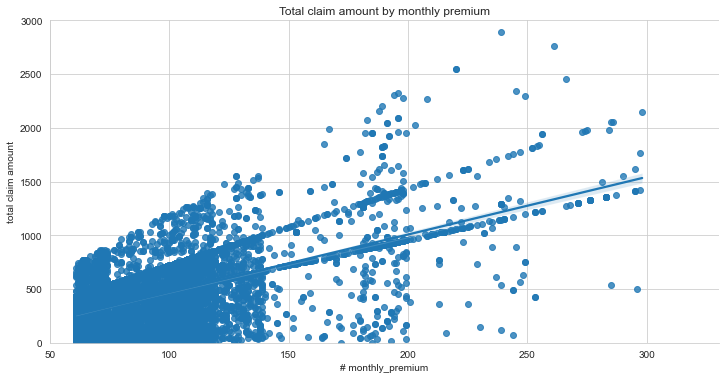

In [63]:
# as there was largest positiv correlation between month_prem_aut and total_claim

sns.set_style("whitegrid")
g = sns.lmplot(x="monthly_premium_auto", y="total_claim_amount",data=df3, aspect=2)
g = (g.set_axis_labels("# monthly_premium","total claim amount").set(xlim=(50,330),ylim=(0,3000)))
plt.title("Total claim amount by monthly premium")
plt.show(g)